In [16]:
!pip install adjustText


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
deg_females_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_>80.csv", index_col=0)

deg_females_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_70-80.csv", index_col=0)

deg_females_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_50-70.csv", index_col=0)

deg_females_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_30-50.csv", index_col=0)

deg_males_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_>80.csv", index_col=0)

deg_males_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_70-80.csv", index_col=0)

deg_males_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_50-70.csv", index_col=0)

deg_males_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_30-50.csv", index_col=0)

In [7]:
import anndata as ad
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [106]:
deg_males_50_70

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10(pvalue),color,-log10(padj),gene_symbol
Gene,,,,,,,,,,
ENSG00000229807.11,113.995572,-2.958401,0.397404,-7.444316,9.744815e-14,2.889045e-09,13.011226,red,8.539246,XIST
ENSG00000185640.5,25.376946,-1.456439,0.228535,-6.372922,1.854597e-10,2.749162e-06,9.731750,red,5.560800,KRT79
ENSG00000243366.3,83.963389,2.539189,0.446530,5.686495,1.296733e-08,9.611061e-05,7.887149,green,4.017229,RN7SL60P
ENSG00000199883.1,17.981382,-1.999717,0.351655,-5.686595,1.295975e-08,9.611061e-05,7.887403,red,4.017229,RN7SKP90
ENSG00000239710.3,4.547767,-1.998197,0.358512,-5.573591,2.495408e-08,1.479627e-04,7.602858,red,3.829848,RN7SL692P
...,...,...,...,...,...,...,...,...,...,...
ENSG00000276351.1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,grey,NaN,ENSG00000276351
ENSG00000275661.1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,grey,NaN,ENSG00000275661
ENSG00000277927.1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,grey,NaN,LOC124905519


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1180120021.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1180120021.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1180120021.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

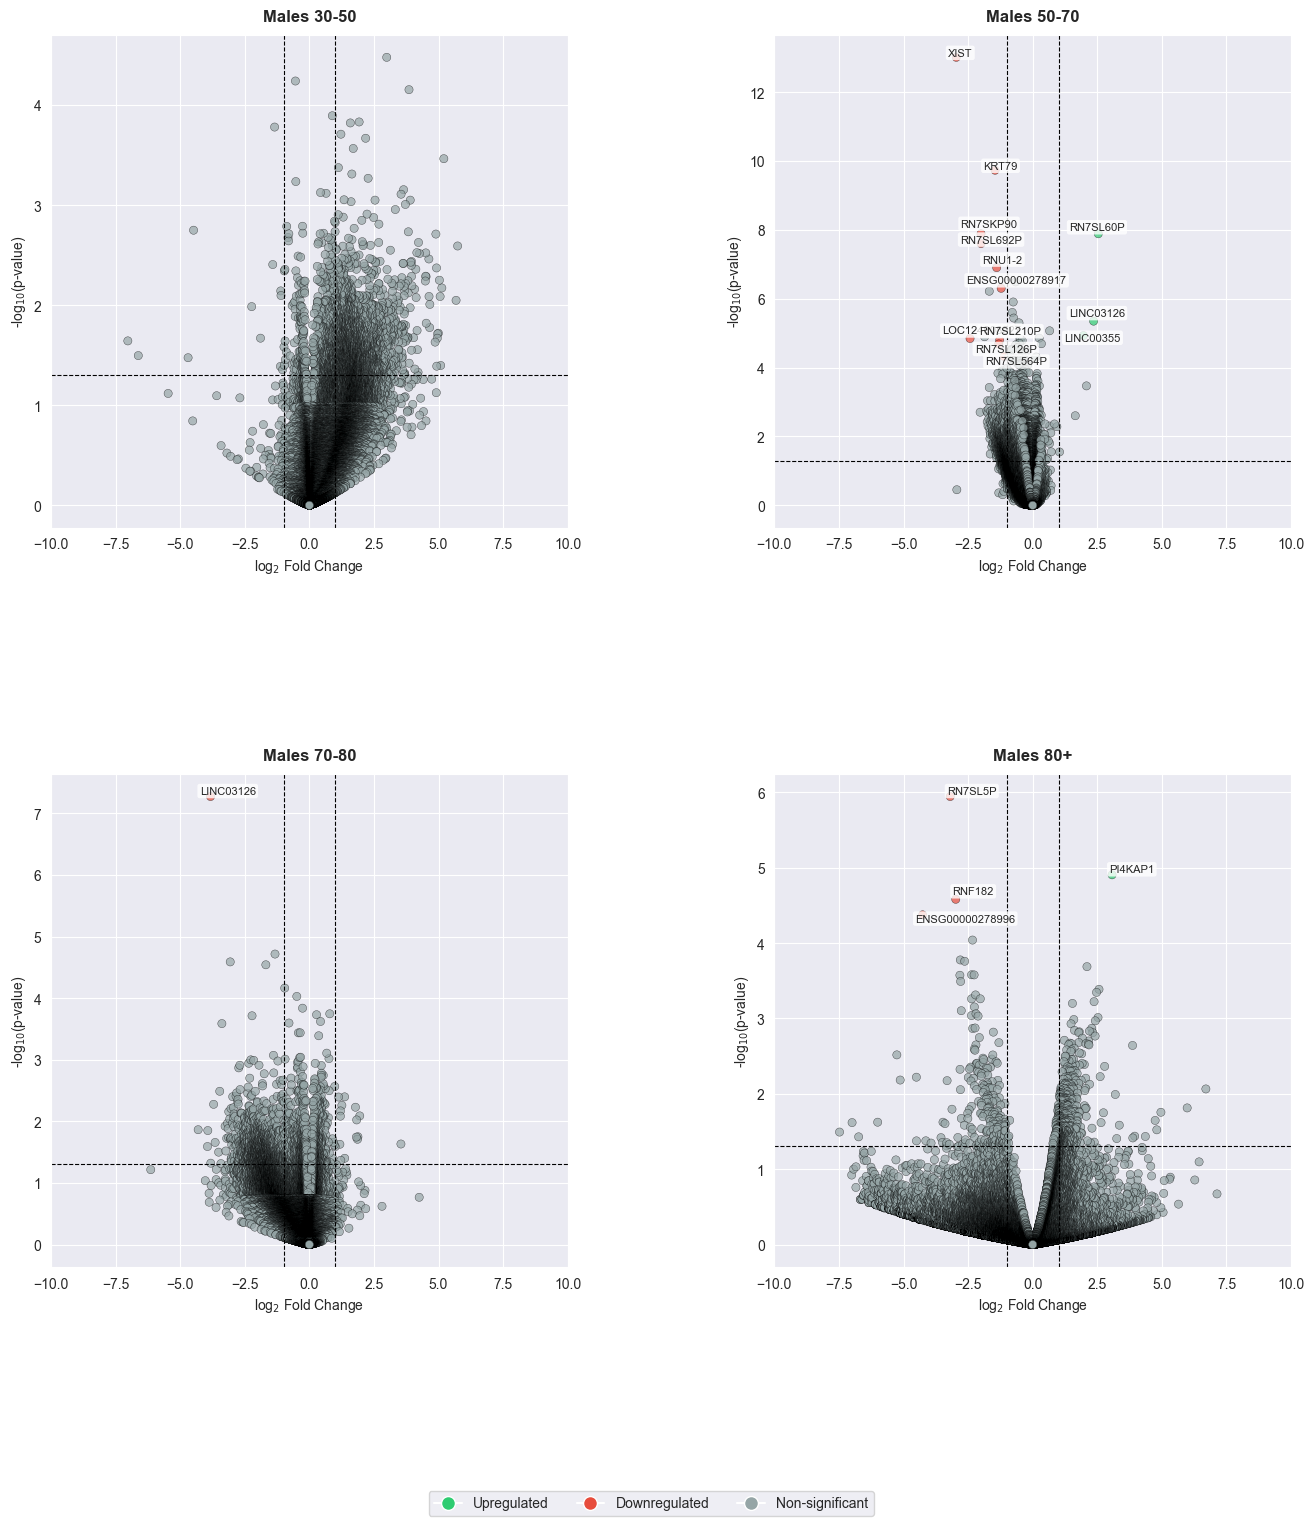


Extreme upregulated genes (>10 FC) by age group:

30-50 (6 genes):
                    gene_symbol  log2FoldChange          padj
Gene                                                         
ENSG00000239808.3     RN7SL255P       25.675006  2.576973e-12
ENSG00000253703.2      IGHV1-68       21.976052  1.177013e-14
ENSG00000262259.1     MTND4LP24       19.962450  1.947120e-06
ENSG00000276540.1     REXO1L10P       17.499452  2.066306e-04
ENSG00000225287.1      OFD1P13Y       14.207984  4.885081e-02
ENSG00000212191.1  LOC124900186       10.166479  5.556550e-01

50-70 (1 genes):
                    gene_symbol  log2FoldChange  padj
Gene                                                 
ENSG00000278591.1  LOC124904144       24.254103   NaN

70-80 (5 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000231930.1  ENSG00000231930       29.909668  6.369407e-15
ENSG00000274959.1  ENSG00000274959       26

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_males_30_50, "Males 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_males_50_70, "Males 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_males_70_80, "Males 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_males_over_80, "Males 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

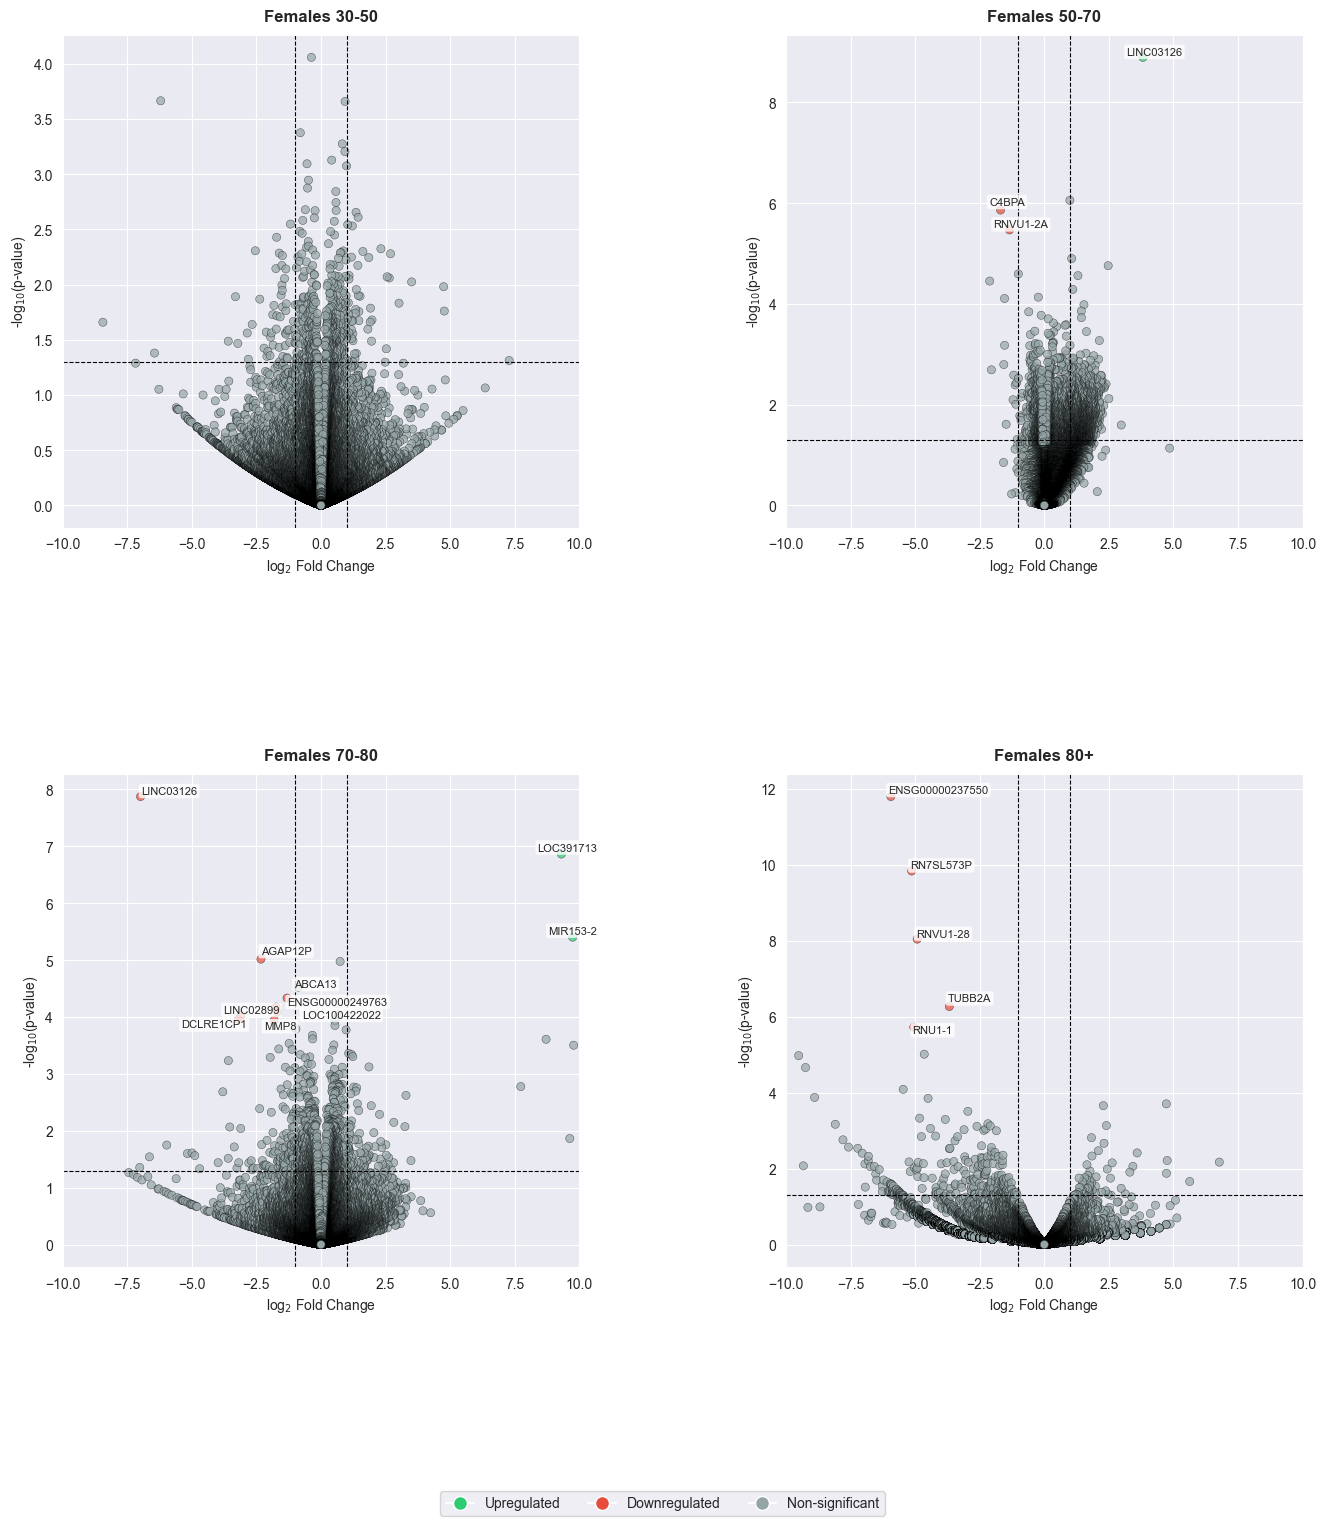


Extreme upregulated genes (>10 FC) by age group:

30-50 (108 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000275414.1  ENSG00000275414       30.000000  2.125265e-12
ENSG00000248417.1  ENSG00000248417       30.000000  2.125265e-12
ENSG00000258170.1  ENSG00000258170       30.000000  2.125265e-12
ENSG00000238003.1          RPL10P4       29.999860  2.125265e-12
ENSG00000212424.1        RNU1-119P       29.999860  2.125265e-12
...                            ...             ...           ...
ENSG00000201827.1  ENSG00000201827       12.569901  3.094489e-01
ENSG00000251936.1        RNA5SP249       12.569901  3.094489e-01
ENSG00000206650.1         SNORA70G       12.569901  3.094489e-01
ENSG00000260335.1  ENSG00000260335       11.845011  5.891533e-01
ENSG00000184724.5         KRTAP6-1       10.966877  9.999969e-01

[108 rows x 3 columns]

50-70 (0 genes):
Empty DataFrame
Columns: [gene_symbol, log2

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_females_30_50, "Females 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_females_50_70, "Females 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_females_70_80, "Females 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_females_over_80, "Females 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

In [31]:
!pip install gseapy

  Using cached gseapy-1.1.8-cp312-cp312-macosx_10_12_x86_64.whl

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))
deg_males_50_70['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_70_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_over_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)

deg_males_50_70_down = deg_males_50_70[(deg_males_50_70['log2FoldChange'] <= -1) & (deg_males_50_70['pvalue'] <= 0.05)]
deg_males_50_70_up = deg_males_50_70[(deg_males_50_70['log2FoldChange'] >= 1) & (deg_males_50_70['pvalue'] <= 0.05)]

deg_males_70_80_down = deg_males_70_80[(deg_males_70_80['log2FoldChange'] <= -1) & (deg_males_70_80['pvalue'] <= 0.05)]
deg_males_70_80_up = deg_males_70_80[(deg_males_70_80['log2FoldChange'] >= 1) & (deg_males_70_80['pvalue'] <= 0.05)]

deg_males_over_80_down = deg_males_over_80[(deg_males_over_80['log2FoldChange'] <= -1) & (deg_males_over_80['pvalue'] <= 0.05)]
deg_males_over_80_up = deg_males_over_80[(deg_males_over_80['log2FoldChange'] >= 1) & (deg_males_over_80['pvalue'] <= 0.05)]

In [148]:
deg_females_50_70['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_70_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_over_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)

deg_females_50_70_down = deg_females_50_70[(deg_females_50_70['log2FoldChange'] <= -1) & (deg_females_50_70['pvalue'] <= 0.05)]
deg_females_50_70_up = deg_females_50_70[(deg_females_50_70['log2FoldChange'] >= 1) & (deg_females_50_70['pvalue'] <= 0.05)]

deg_females_70_80_down = deg_females_70_80[(deg_females_70_80['log2FoldChange'] <= -1) & (deg_females_70_80['pvalue'] <= 0.05)]
deg_females_70_80_up = deg_females_70_80[(deg_females_70_80['log2FoldChange'] >= 1) & (deg_females_70_80['pvalue'] <= 0.05)]

deg_females_over_80_down = deg_females_over_80[(deg_females_over_80['log2FoldChange'] <= -1) & (deg_females_over_80['pvalue'] <= 0.05)]
deg_females_over_80_up = deg_females_over_80[(deg_females_over_80['log2FoldChange'] >= 1) & (deg_females_over_80['pvalue'] <= 0.05)]

In [116]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2023',
                'GO_Molecular_Function_2023',
                'GO_Cellular_Component_2023',
                'SynGO_2024',
                'OMIM_Disease']

enr_males_50_70_down = gp.enrichr(gene_list=deg_males_50_70_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_males_50_70_up = gp.enrichr(gene_list=deg_males_50_70_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

enr_males_70_80_down = gp.enrichr(gene_list=deg_males_70_80_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_males_70_80_up = gp.enrichr(gene_list=deg_males_70_80_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

enr_males_over_80_down = gp.enrichr(gene_list=deg_males_over_80_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_males_over_80_up = gp.enrichr(gene_list=deg_males_over_80_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


In [119]:
enr_males_50_70_down.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Wnt-beta Catenin Signaling,1/42,0.975680,0.999996,0,0,0.263475,0.006487,DKK4
1,MSigDB_Hallmark_2020,KRAS Signaling Dn,8/200,0.995814,0.999996,0,0,0.448238,0.001880,GRID2;SMPX;SCGB1A1;NGB;KCNN1;YBX2;TSHB;SSTR4
2,MSigDB_Hallmark_2020,Pperoxisome,2/104,0.998938,0.999996,0,0,0.211231,0.000224,CRABP1;SCGB1A1
3,MSigDB_Hallmark_2020,Androgen Response,1/100,0.999855,0.999996,0,0,0.108770,0.000016,AZGP1
4,MSigDB_Hallmark_2020,Spermatogenesis,2/135,0.999911,0.999996,0,0,0.161721,0.000014,PDHA2;YBX2
...,...,...,...,...,...,...,...,...,...,...
1858,OMIM_Disease,epilepsy,2/58,0.962438,0.999944,0,0,0.385714,0.014767,SYN1;GABRG2
1859,OMIM_Disease,myopathy,1/44,0.979629,0.999944,0,0,0.251193,0.005170,CNTN1
1860,OMIM_Disease,diabetes mellitus,1/58,0.994108,0.999944,0,0,0.189351,0.001119,MBL2
1861,OMIM_Disease,diabetes,1/75,0.998693,0.999944,0,0,0.145716,0.000191,MBL2


In [122]:
enr_males_50_70_down_pivot = enr_males_50_70_down.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_50_70_down_pivot = enr_males_50_70_down_pivot.fillna(1)

enr_males_50_70_up_pivot = enr_males_50_70_up.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_50_70_up_pivot = enr_males_50_70_up_pivot.fillna(1)

enr_males_70_80_down_pivot = enr_males_70_80_down.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_70_80_down_pivot = enr_males_70_80_down_pivot.fillna(1)

enr_males_70_80_up_pivot = enr_males_70_80_up.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_70_80_up_pivot = enr_males_70_80_up_pivot.fillna(1)

enr_males_over_80_down_pivot = enr_males_over_80_down.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_over_80_down_pivot = enr_males_over_80_down_pivot.fillna(1)

enr_males_over_80_up_pivot = enr_males_over_80_up.results.pivot(index='Term', columns='Genes', values='P-value')
enr_males_over_80_up_pivot = enr_males_over_80_up_pivot.fillna(1)

In [130]:
enr_males_50_70_down.results[enr_males_50_70_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1717,GO_Cellular_Component_2023,Neuron To Neuron Synapse (GO:0098984),3/10,0.04618,0.999996,0,0,4.643745,14.28044,GRIA2;RS1;PDYN


In [131]:
enr_males_50_70_up.results[enr_males_50_70_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [132]:
enr_males_70_80_down.results[enr_males_70_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
48,KEGG_2021_Human,Arginine and proline metabolism,10/50,0.019306,0.999995,0,0,2.351721,9.283053,GAMT;CKMT2;NOS2;NOS3;AMD1;CARNS1;NOS1;PYCR3;SR...
49,KEGG_2021_Human,Axon guidance,25/182,0.044546,0.999995,0,0,1.499930,4.666616,ITGB1;SEMA3A;GNAI3;RND1;ROBO1;CDC42;EFNB1;EFNB...
347,WikiPathways_2024_Human,Serotonin Transporter Activity WP1455,4/11,0.016293,0.999973,0,0,5.368398,22.101774,IL1B;NOS1;STX1A;SLC6A4
348,WikiPathways_2024_Human,Nitric Oxide Metabolism In Cystic Fibrosis WP4947,4/13,0.030216,0.999973,0,0,4.174958,14.609838,NOS2;NOS3;CARM1;NOS1
349,WikiPathways_2024_Human,Effects Of Nitric Oxide WP1995,3/8,0.034535,0.999973,0,0,5.634511,18.964549,NOS2;NOS3;NOS1
...,...,...,...,...,...,...,...,...,...,...
7057,SynGO_2024,Postsynaptic Density Membrane (GO:0098839) CC,3/7,0.023225,0.797945,0,0,7.043529,26.501503,ACTN2;NOL3;PACSIN1
7058,SynGO_2024,Regulation Of Neurotransmitter Receptor Locali...,7/32,0.029919,0.797945,0,0,2.632000,9.236350,MAGI2;TMEM108;ADAM10;KIF2C;KALRN;GPC6;OGT
7059,SynGO_2024,Transmitter-Gated IC Activity Involved In Regu...,8/42,0.044710,0.797945,0,0,2.211814,6.873342,GABRA2;GRIA2;CHRND;GLRB;CHRNA7;GABRA4;GRIN2C;G...
7060,SynGO_2024,Neuronal Dense Core Vesicle (GO:0098992) CC,6/28,0.047137,0.797945,0,0,2.562728,7.828364,BDNF;CACNA2D1;DMXL2;PLAT;ADRB2;STXBP5L


In [133]:
enr_males_70_80_up.results[enr_males_70_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
5,WikiPathways_2024_Human,16P11 2 Distal Deletion Syndrome WP4950,1/31,0.032066,0.128264,0,0,33.248333,114.372915,MPL
9,Human_Phenotype_Ontology,Spontaneous abortion (HP:0005268),2/11,0.000057,0.002067,0,0,233.567251,2280.803907,MPL;XIST
10,Human_Phenotype_Ontology,Abnormal delivery (HP:0001787),2/28,0.000390,0.007028,0,0,80.781377,633.994128,MPL;XIST
11,Human_Phenotype_Ontology,Thrombocytosis (HP:0001894),1/12,0.012531,0.087018,0,0,90.763636,397.505318,MPL
12,Human_Phenotype_Ontology,Tinnitus (HP:0000360),1/16,0.016674,0.087018,0,0,66.546667,272.434060,MPL
13,Human_Phenotype_Ontology,Abnormality of the heme biosynthetic pathway (...,1/17,0.017708,0.087018,0,0,62.384375,251.643234,MPL
14,Human_Phenotype_Ontology,Gingival bleeding (HP:0000225),1/20,0.020801,0.087018,0,0,52.526316,203.420329,MPL
15,Human_Phenotype_Ontology,Arterial thrombosis (HP:0004420),1/22,0.022859,0.087018,0,0,47.519048,179.546868,MPL
16,Human_Phenotype_Ontology,Chest pain (HP:0100749),1/24,0.024912,0.087018,0,0,43.382609,160.186147,MPL
17,Human_Phenotype_Ontology,Decreased skull ossification (HP:0004331),1/25,0.025937,0.087018,0,0,41.572917,151.827665,MPL


In [134]:
enr_males_over_80_down.results[enr_males_over_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
50,KEGG_2021_Human,Calcium signaling pathway,27/240,0.008775,0.999995,0,0,1.717708,8.134847,RYR2;CALML6;FLT4;ADCY3;MST1R;ADRB2;CACNA1F;RYR...
51,KEGG_2021_Human,Insulin secretion,12/86,0.015174,0.999995,0,0,2.189839,9.171441,RYR2;PCLO;GNA11;ADCY3;KCNN1;ATP1B2;KCNN3;CACNA...
52,KEGG_2021_Human,Circadian entrainment,13/97,0.016194,0.999995,0,0,2.090301,8.618526,RYR2;CALML6;ADCY3;CACNA1H;RYR3;GRIN2D;GRIN1;CA...
53,KEGG_2021_Human,Cocaine addiction,8/49,0.018413,0.999995,0,0,2.631950,10.513870,GRM2;GRIN3B;DLG4;PPP1R1B;FOSB;PRKACB;GRIN1;GRIN2D
54,KEGG_2021_Human,GnRH secretion,9/64,0.031474,0.999995,0,0,2.207188,7.633745,CACNA1I;GNA11;KISS1R;KCNN1;KCNN3;CACNA1F;CACNA...
...,...,...,...,...,...,...,...,...,...,...
5723,GO_Cellular_Component_2023,Synaptic Membrane (GO:0097060),6/31,0.017986,0.999995,0,0,3.235388,13.000353,DAGLA;DLG4;PDE2A;TMEM240;SHISA7;GRIN1
5724,GO_Cellular_Component_2023,Sodium Channel Complex (GO:0034706),4/18,0.032055,0.999995,0,0,3.848350,13.239510,SCNN1A;SCN1B;SCN2B;TRPM4
5725,GO_Cellular_Component_2023,Dendrite Membrane (GO:0032590),5/28,0.040964,0.999995,0,0,2.928796,9.357695,DAGLA;KCNC3;GABRA4;FOXM1;SHISA7
6008,SynGO_2024,Postsynaptic Endocytic Zone (GO:0098843) CC,4/18,0.032055,0.714747,0,0,3.848350,13.239510,CALY;CLTC;AP2A1;AP2B1


In [135]:
enr_males_over_80_up.results[enr_males_over_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
37,KEGG_2021_Human,Long-term depression,5/60,0.007739,0.998046,0,0,4.373936,21.263741,RYR1;GUCY1A2;GRIA2;GRID2;CACNA1A
38,KEGG_2021_Human,Glycerolipid metabolism,4/61,0.036657,0.998046,0,0,3.367731,11.134263,TKFC;DGAT1;DGKZ;PLPP2
39,KEGG_2021_Human,Nicotine addiction,3/40,0.048636,0.998046,0,0,3.885533,11.747462,GRIA2;CACNA1A;GABRG2
272,WikiPathways_2024_Human,Autosomal Recessive Osteopetrosis Pathways WP4788,3/11,0.001257,0.421169,0,0,17.997243,120.200924,OSTM1;TRAF6;TNFRSF11A
273,WikiPathways_2024_Human,ApoE And miR 146 In Inflammation And Atheroscl...,2/8,0.010867,0.855207,0,0,15.960065,72.171416,TRAF6;APOE
...,...,...,...,...,...,...,...,...,...,...
3293,GO_Cellular_Component_2023,Podosome (GO:0002102),2/12,0.024264,0.881434,0,0,9.574083,35.603651,SH3PXD2A;FERMT3
3294,GO_Cellular_Component_2023,Monoatomic Ion Channel Complex (GO:0034702),3/36,0.037300,0.881434,0,0,4.357398,14.330497,UNC80;GRID2;OSTM1
3295,GO_Cellular_Component_2023,Ciliary Membrane (GO:0060170),3/38,0.042779,0.881434,0,0,4.107983,12.947209,TMEM67;BBS9;BBS5
3480,SynGO_2024,Postsynaptic Membrane (GO:0045211) CC,2/13,0.028292,0.576482,0,0,8.703267,31.028804,NRGN;KCTD16


In [145]:
print("LRRK2 >80", deg_males_over_80_up[deg_males_over_80_up['gene_symbol'] == 'LRRK2'].loc[:, ['gene_symbol', 'log2FoldChange', 'padj']])

LRRK2 >80                    gene_symbol  log2FoldChange      padj
Gene                                                    
ENSG00000073331.17       LRRK2        1.391003  0.254149


In [149]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2023',
                'GO_Molecular_Function_2023',
                'GO_Cellular_Component_2023',
                'SynGO_2024',
                'OMIM_Disease']

enr_females_50_70_down = gp.enrichr(gene_list=deg_females_50_70_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_females_50_70_up = gp.enrichr(gene_list=deg_females_50_70_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

enr_females_70_80_down = gp.enrichr(gene_list=deg_females_70_80_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_females_70_80_up = gp.enrichr(gene_list=deg_females_70_80_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

enr_females_over_80_down = gp.enrichr(gene_list=deg_females_over_80_down['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')
enr_females_over_80_up = gp.enrichr(gene_list=deg_females_over_80_up['gene_symbol'].tolist(),
                 gene_sets=gene_sets,
                 organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


In [150]:
enr_females_over_80_up.results[enr_females_over_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
20,WikiPathways_2024_Human,Cori Cycle WP1946,1/17,0.044125,0.262708,0,0,23.955529,74.758961,PGK2
36,Human_Phenotype_Ontology,Frequent falls (HP:0002359),1/12,0.031349,0.167663,0,0,34.853147,120.681684,KIF1C
37,Human_Phenotype_Ontology,Absence seizures (HP:0002121),1/16,0.041583,0.167663,0,0,25.553846,81.263046,KCNMA1
53,GO_Biological_Process_2023,Positive Regulation Of Pyruvate Dehydrogenase ...,1/5,0.013181,0.201529,0,0,95.879808,415.060560,PDPR
54,GO_Biological_Process_2023,Regulation Of Pyruvate Dehydrogenase Activity ...,1/6,0.015797,0.201529,0,0,76.700000,318.147301,PDPR
55,GO_Biological_Process_2023,Dense Core Granule Cytoskeletal Transport (GO:...,1/6,0.015797,0.201529,0,0,76.700000,318.147301,KIF1C
56,GO_Biological_Process_2023,Negative Regulation Of Retrograde Protein Tran...,1/8,0.021008,0.201529,0,0,54.780220,211.608151,YOD1
57,GO_Biological_Process_2023,"Complement Activation, Lectin Pathway (GO:0001...",1/8,0.021008,0.201529,0,0,54.780220,211.608151,FCN2
58,GO_Biological_Process_2023,Cell Surface Pattern Recognition Receptor Sign...,1/8,0.021008,0.201529,0,0,54.780220,211.608151,FCN2
59,GO_Biological_Process_2023,Positive Regulation Of Opsonization (GO:1903028),1/8,0.021008,0.201529,0,0,54.780220,211.608151,FCN2


In [153]:
print("LRRK2 >80", deg_females_over_80_down[deg_females_over_80_down['gene_symbol'] == 'LRRK2'].loc[:, ['gene_symbol', 'log2FoldChange', 'padj']])


LRRK2 >80 Empty DataFrame
Columns: [gene_symbol, log2FoldChange, padj]
Index: []
